In [1]:
import numpy as np
import jax
import jax.numpy as jnp
import jax.scipy as jsc

import matplotlib.pyplot as plt
import astropy.constants as c
from astropy.units import Quantity
import astropy.units as u

from gala.potential import PlummerPotential
from gala.units import galactic

from mwgcs import Einasto

Gravitree path added to sys.path.


In [3]:
alpha = 0.18601436
r2 = 4.5
rho2 = 10**(6.53292207)

e = Einasto(alpha, 4.5, 6.53292207)
r = jnp.logspace(-3, 3, 100)

In [15]:
accel = jax.grad(e.potential, argnums=0)

In [17]:
accel([3., 0., 0.])

[Array(-894.36035, dtype=float32, weak_type=True),
 Array(-0., dtype=float32, weak_type=True),
 Array(-0., dtype=float32, weak_type=True)]

In [22]:
(e.potential([2.99, 0., 0.]) - e.potential([3.01, 0., 0.])) / (3.01 - 2.99)

Array(894.72656, dtype=float32)

In [4]:
hess = jax.hessian(einastoPotential, argnums=0)

In [10]:

gh = pot.hessian(jnp.array([r, jnp.zeros_like(r), jnp.zeros_like(r)])).to(u.Gyr**(-2)).value.T
mh = jnp.array([hess(jnp.array([r_i, 0, 0]), alpha, r2, rho2) for r_i in r])

_tt = jnp.array([e.tidalStrength(jnp.array([r_i, 0., 0.]), False) for r_i in r])

g_tt = jnp.array([-(1/3)*jnp.trace(gh_i) * jnp.identity(3) + gh_i for gh_i in gh])
m_tt = jnp.array([-(1/3)*jnp.trace(mh_i) * jnp.identity(3) + mh_i for mh_i in mh])

In [11]:
g_lam = np.max(np.abs(np.linalg.eig(g_tt)[0]), axis=1)
m_lam = np.max(np.abs(np.linalg.eig(m_tt)[0]), axis=1)

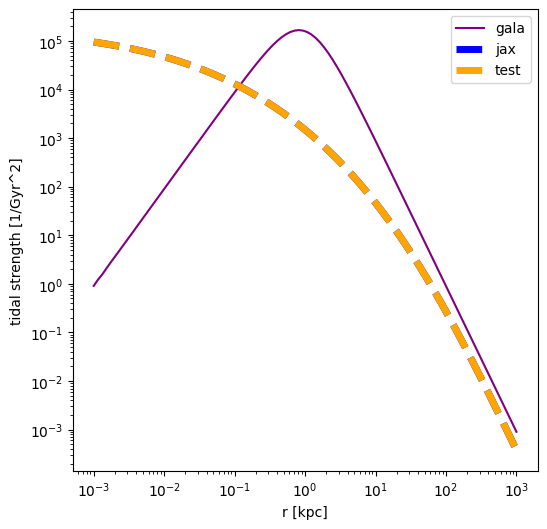

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.loglog(r, g_lam, c='purple', label='gala')
ax.loglog(r, m_lam, c='blue', ls='--', lw=5, label='jax')
ax.loglog(r, _tt, c='orange', ls='--', lw=5, label='test')
ax.set_xlabel('r [kpc]')
ax.set_ylabel('tidal strength [1/Gyr^2]')
ax.legend()
plt.show()

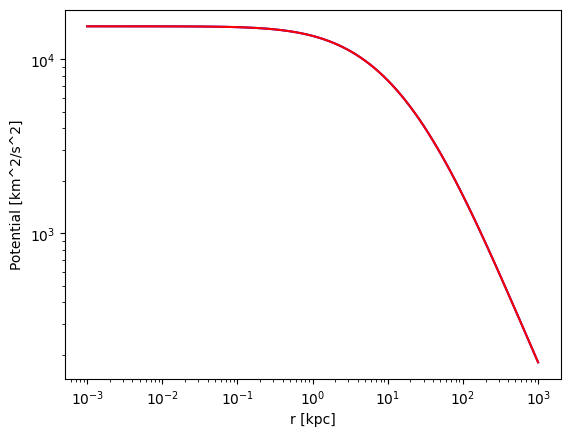

In [9]:
fig, ax = plt.subplots()

conv_factor = (u.kpc**2 / u.Gyr**2).to(u.km**2 / u.s**2)
ax.loglog(r, einastoPotential(jnp.array([r, jnp.zeros_like(r), jnp.zeros_like(r)]), alpha, r2, rho2) * conv_factor, c='blue', label='jax')
ax.loglog(r, e.potential(jnp.array([r, jnp.zeros_like(r), jnp.zeros_like(r)])) * conv_factor, c='r', label='jax')
ax.set_xlabel('r [kpc]')
ax.set_ylabel('Potential [km^2/s^2]')
plt.show()

In [29]:
einastoPotential([3., 0., 0.], alpha, r2, rho2), potential([3., 0., 0.], alpha, r2, np.log10(rho2))

(Array(11804.395, dtype=float32), Array(11804.395, dtype=float32))

In [13]:
4 * np.pi * _g * (10**(6.5)) * jnp.exp(2/alpha)/alpha

Array(44895604., dtype=float32)

In [14]:
4 * np.pi * _g * 10**(6) * jnp.exp(2/alpha)/alpha

Array(14197236., dtype=float32)